###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(["CustomerID"], axis=1, inplace= True)

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

<Axes: xlabel='Gender', ylabel='count'>

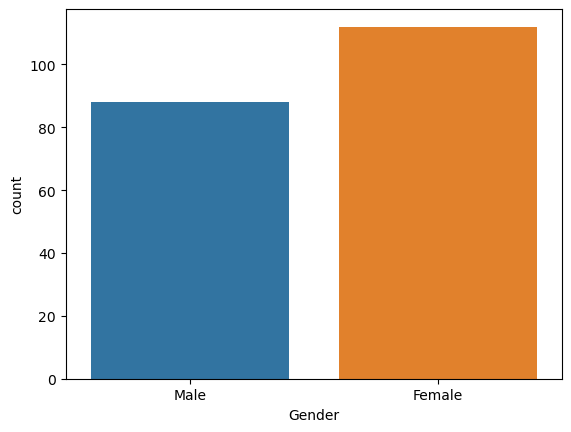

In [9]:
sns.countplot(x= "Gender", data= df)

In [10]:
#Investigate different age groups for males and females
males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\800919240.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\800919240.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

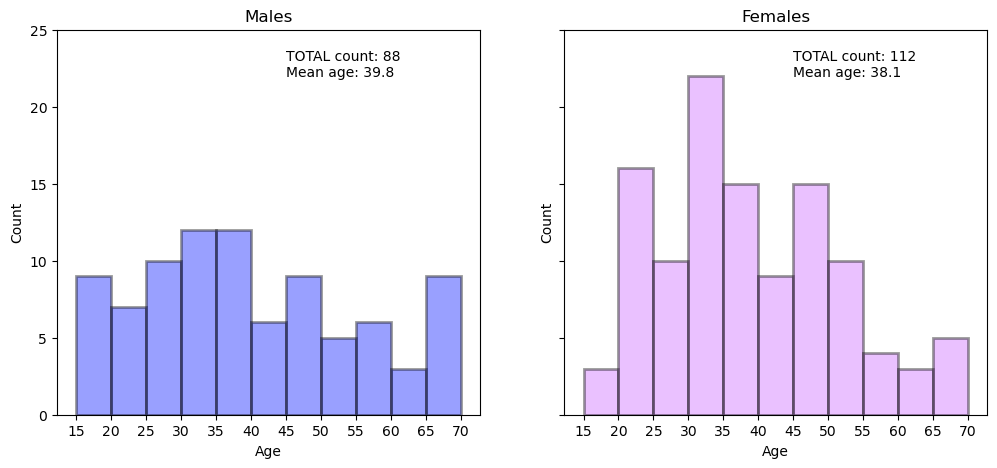

In [11]:
age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_ylim(top=25)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\1682504091.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_annual_income, bins=income_bin, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\1682504091.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

Text(82, 31, 'Standard deviation score: 26.0')

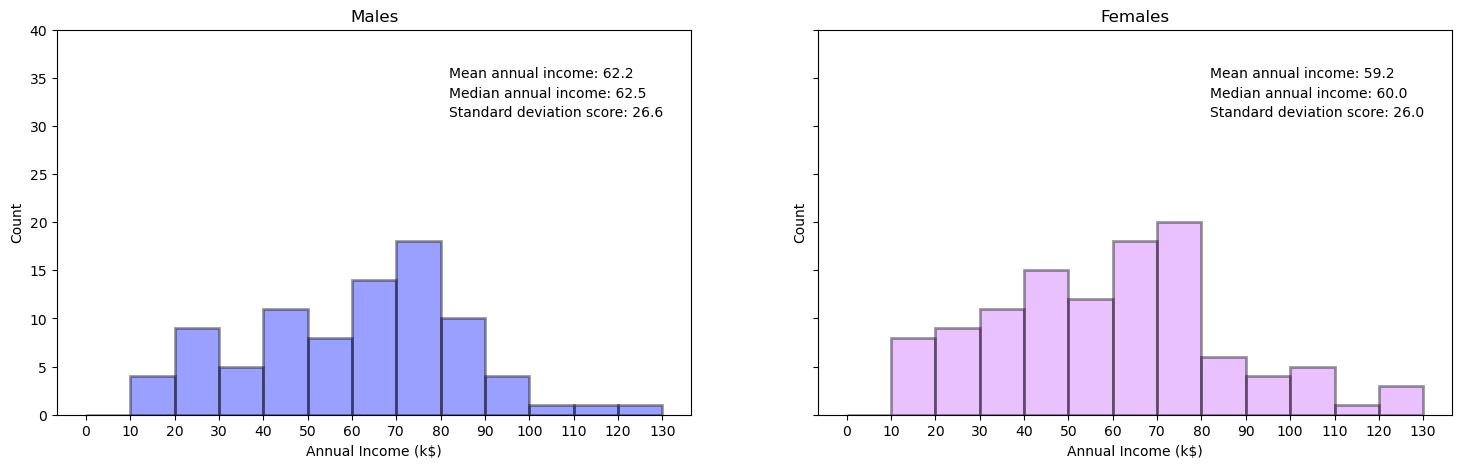

In [12]:
#Who have more income? 
male_annual_income = df[df['Gender']=='Male']['Annual Income (k$)'] # subset with males spending power
female_annual_income = df[df['Gender']=='Female']['Annual Income (k$)'] # subset with spending power

income_bin = range(0,140,10)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5), sharey=True)
sns.distplot(male_annual_income, bins=income_bin, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(income_bin)
ax1.set_ylim(top=40)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(82,35, "Mean annual income: {:.1f}".format(male_annual_income.mean()))
ax1.text(82,33, "Median annual income: {:.1f}".format(male_annual_income.median()))
ax1.text(82,31, "Standard deviation score: {:.1f}".format(male_annual_income.std()))

# females histogram
sns.distplot(female_annual_income, bins=income_bin, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(income_bin)
ax2.set_ylim(top=40)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(82,35, "Mean annual income: {:.1f}".format(female_annual_income.mean()))
ax2.text(82,33, "Median annual income: {:.1f}".format(female_annual_income.median()))
ax2.text(82,31, "Standard deviation score: {:.1f}".format(female_annual_income.std()))

C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\2382136774.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_spendings, bins=spending_bin, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\Divo\AppData\Local\Temp\ipykernel_14060\2382136774.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

Text(50, 13, 'Standard deviation score: 24.1')

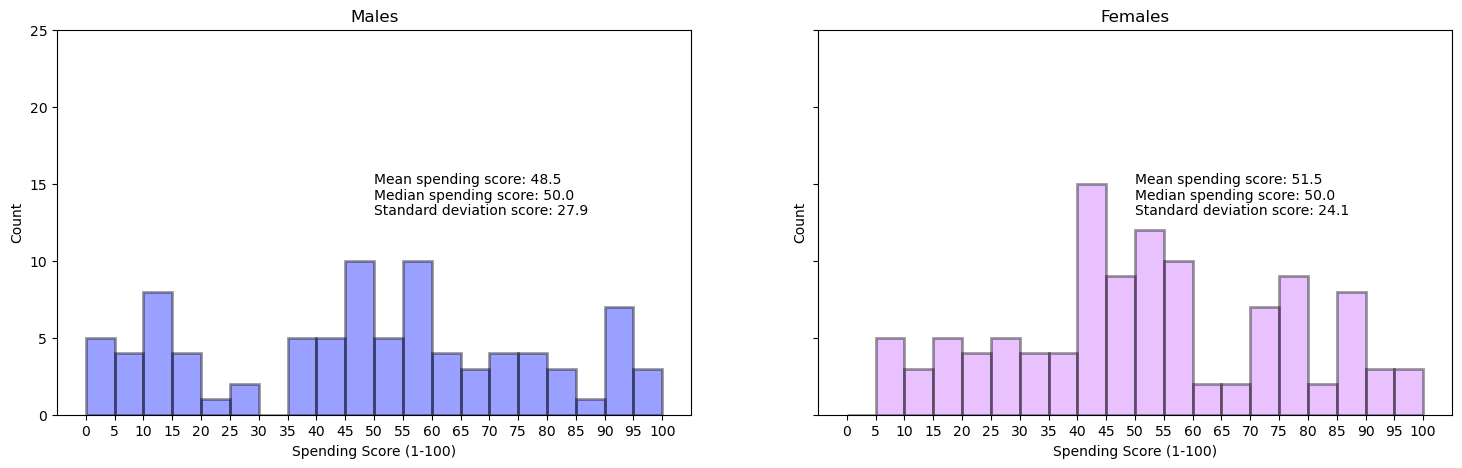

In [13]:
#Who spends more? 
male_spendings = df[df['Gender']=='Male']['Spending Score (1-100)'] # subset with males spending power
female_spendings = df[df['Gender']=='Female']['Spending Score (1-100)'] # subset with spending power

spending_bin = range(0,105,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5), sharey=True)
sns.distplot(male_spendings, bins=spending_bin, kde=False, color='#0013FF', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bin)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(male_spendings.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(male_spendings.median()))
ax1.text(50,13, "Standard deviation score: {:.1f}".format(male_spendings.std()))

# females histogram
sns.distplot(female_spendings, bins=spending_bin, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bin)
ax2.set_ylim(top=25)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(female_spendings.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(female_spendings.median()))
ax2.text(50,13, "Standard deviation score: {:.1f}".format(female_spendings.std()))

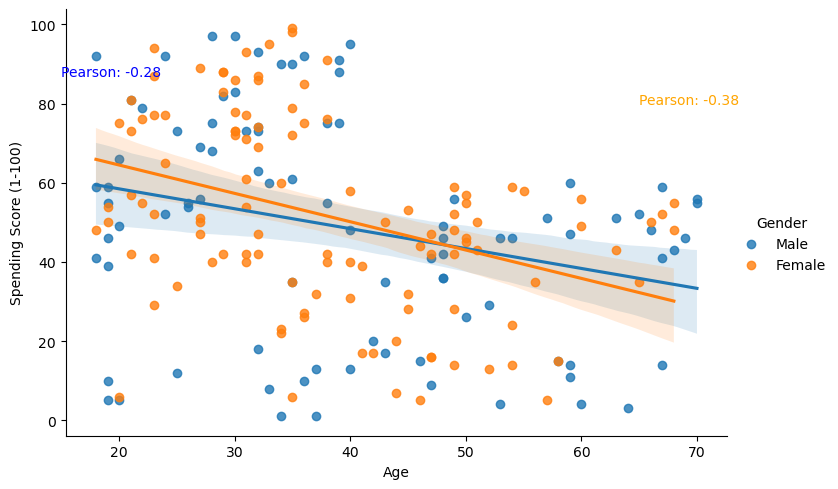

In [14]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
corr1, _ = pearsonr(males_age.values, male_spendings.values)
corr2, _ = pearsonr(females_age.values, female_spendings.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', aspect=1.5)

plt.text(15, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

The previous analysis tells us that male and female statistics are close, so we can rely on the "Gender" column to express male and female together without the need to separate them.

Text(0.5, 1.0, 'Annual Income vs Spending Score')

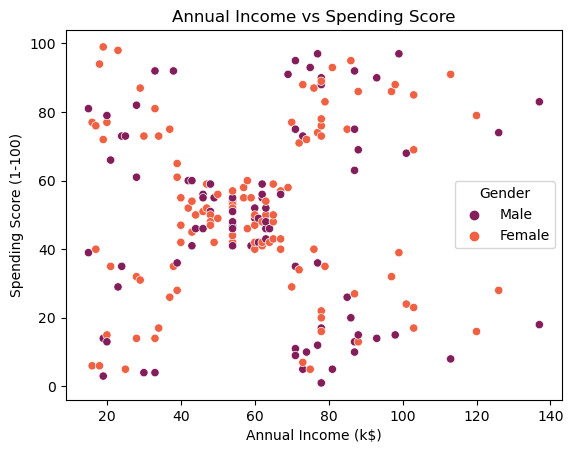

In [15]:
sns.scatterplot(df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',palette='rocket')
plt.title('Annual Income vs Spending Score')

<Axes: >

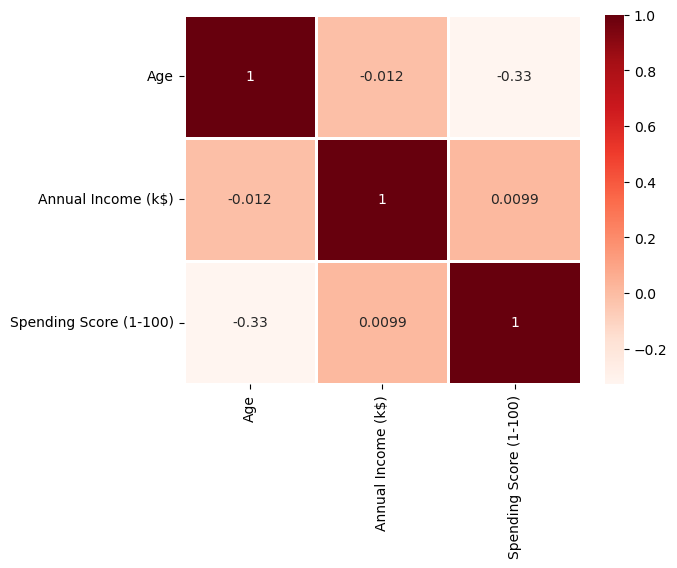

In [16]:
sns.heatmap(df[['Age',"Annual Income (k$)",'Spending Score (1-100)']].corr(), annot=True,linewidth=.8, cmap="Reds")

### Trying K-Means Clustering 

c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

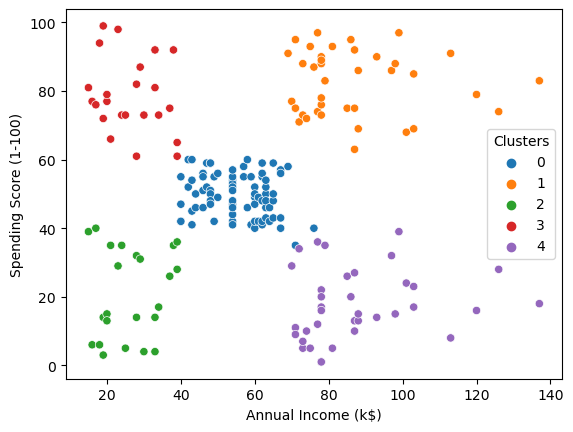

In [17]:
## Selecting some Features
feat=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

## Defining K and Making the Model
k=5
K_means=KMeans(init="k-means++",n_clusters=k)
K_means.fit(feat)

df['Clusters']=K_means.labels_

sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Clusters',palette='tab10')

#### We have 5 types of Customers

- 1. $\color{green}{\text{Low Income - Low Spend score }}$
- 2.  $\color{red}{\text{Low Income - High spend score}}$
- 3.   $\color{blue}{\text{Medium}}$
- 4.  $\color{purple}{\text{High Income - Low Spend score}}$
- 5.  $\color{orange}{\text{High Income - High Spend score}}$


In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


Text(0.5, 1.0, 'Age vs Annual Income (Clusters)')

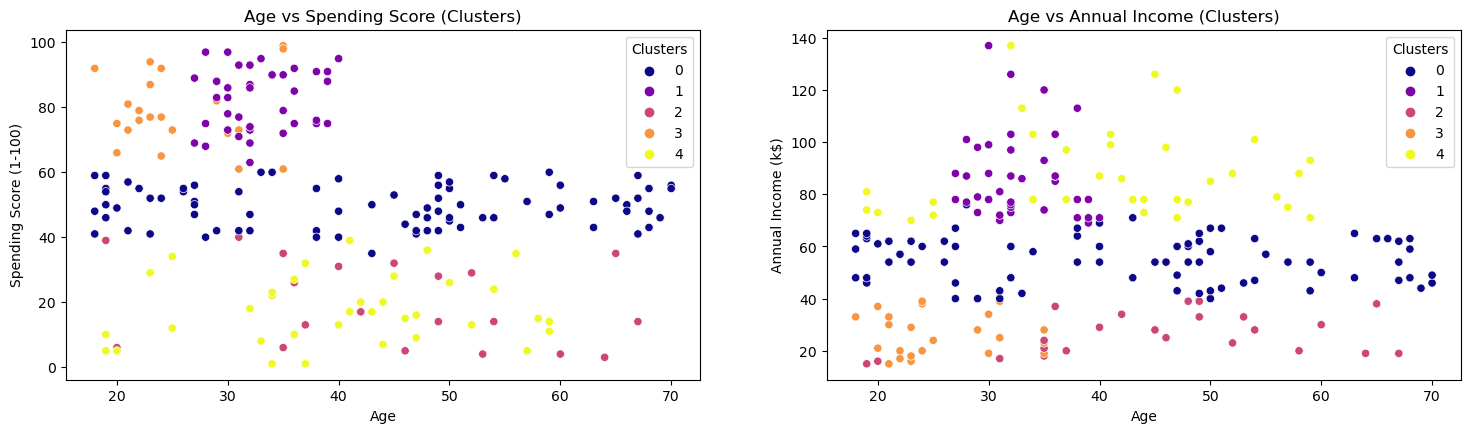

In [19]:
## Age vs Other Feature After Clustering 
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.scatterplot(data=df,x='Age', y='Spending Score (1-100)',hue='Clusters',palette='plasma')
ax.set_title("Age vs Spending Score (Clusters)")



ax=fig.add_subplot(2,2,2)
sns.scatterplot(data=df,x='Age', y='Annual Income (k$)',hue='Clusters',palette='plasma')
ax.set_title("Age vs Annual Income (Clusters)")

From the Above Plots seems Age is not well segmented  


-----

# saving the model 


In [21]:
import joblib

joblib_file = "Mall Customer Segmentation Model"

joblib.dump(K_means,joblib_file)

loaded_model = joblib.load(open(joblib_file,'rb'))